In [2]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# One-Sample

Mean: Expected value of x:  E(x) = $\bar{x}$

If you place the data on the y-axis of a scatterplot

E(Y) = $\mu$$_{Y}$

Variance: expected value of squared deviations from the mean

V(x) = E [(x-$\bar{x})^{2}$]

Linear model: y<sub>i = $\mu$ + $\epsilon$<sub>i

In [4]:
# toy dataset
One=pd.Series([1,2,3,4,5],name="One")
df1=pd.concat([One],axis='columns')
df1

,One
0,1
1,2
2,3
3,4
4,5


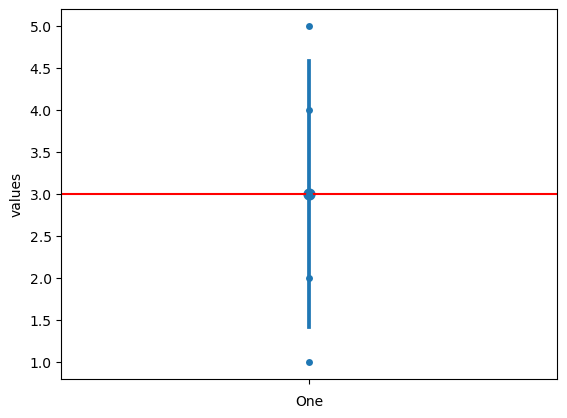

In [6]:
sns.swarmplot(y=df1['One'],data=df1)
sns.pointplot(y=df1['One'],data=df1,errorbar='sd')
plt.xlabel('One')
plt.ylabel('values')
plt.axhline(y=3,color="red")

# 1 Sample T-Test

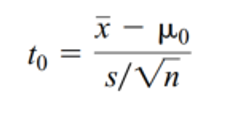

In [10]:
stats.ttest_1samp(df1["One"],7)

TtestResult(statistic=-5.65685424949238, pvalue=0.004812678330044227, df=4)

In [12]:
((df1["One"].mean() - 7) )/( df1["One"].std(ddof=1)/ np.sqrt(5))

-5.65685424949238

In [14]:
2*(stats.t.cdf(-5.66,4))

0.004802981210132725

# Two-Sample

Expected value of x1:  E(x1) = $\bar{x1}$

Expected value of x2:  E(x2) = $\bar{x2}$

E(X1+X2) = E(X1) + E(X2) =  $\bar{x1}$ + $\bar{x2}$
the mean of the sum of two random variables is equal to the sum of their means

E(X1-X2) = E(X1) - E(X2) =  $\bar{x1}$ - $\bar{x2}$
the mean of the difference of two random variables is equal to the difference of their means

E(Y|x) = $\mu$$_{Y|x}$

The expected value of Y given x (x=x1 or x2 for 2 samples)

Variance

V(x1+x2) = V(x1) + V(x2) only if x1 and x2 are independent

V(x1-x2) = V(x1) + V(x2) if independent

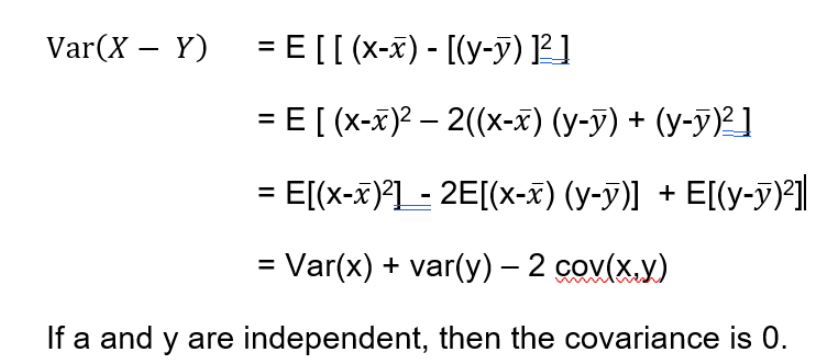

Linear model:  y<sub>ij = $\mu$<sub>i</sub> + $\epsilon$<sub>ij

In [84]:
Two=pd.Series([6,7,8,9,10],name="Two")
df2=pd.concat([One,Two],axis='columns')
df2

,One,Two
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


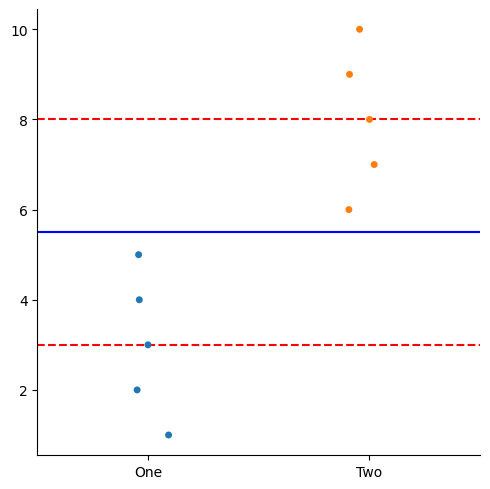

In [86]:
# Cat Plot Between and Within OR Treatment and Error Effects
sns.catplot(data=df2)
plt.axhline(y=5.5,color="blue")
plt.axhline(y=3, linestyle='--',color="red") 
plt.axhline(y=8, linestyle='--',color="red")

# Two-Sample t-test

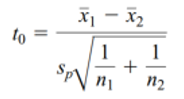

In [89]:
stats.ttest_ind(df2["One"], df2["Two"])

TtestResult(statistic=-5.0, pvalue=0.001052825793366539, df=8.0)

In [91]:
s_pooled=np.sqrt((((5-1)*df2["One"].std(ddof=1)**2)+((5-1)*df2["Two"].std(ddof=1)**2))/(5+5-2))
(df2["One"].mean()-df2["Two"].mean())/ (s_pooled* np.sqrt(1/5+1/5))

-5.0

In [93]:
2*stats.t.cdf(-5,8)

0.001052825793366539

Two-Sample t-test as 2-sample ANOVA

In [30]:
# grand mean
GM=(np.mean(One)+np.mean(Two))/2
GM

5.5

In [32]:
# summarize the  data and describe
df2.describe()

,One,Two
count,5.000000,5.000000
mean,3.000000,8.000000
std,1.581139,1.581139
min,1.000000,6.000000
25%,2.000000,7.000000
50%,3.000000,8.000000
75%,4.000000,9.000000
max,5.000000,10.000000


Sum of Squares Treatment 

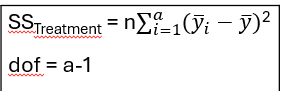

In [35]:
5 * ((np.mean(One)-GM)**2 + (np.mean(Two)-GM)**2 )

62.5

Mean Squares Treatment

dof= a-1 = 1

Sum of Squares Error

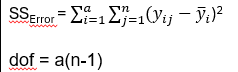

dof = 2(5-1) = 8

In [39]:
np.sum( ((One-np.mean(One))**2) + ((Two-np.mean(Two))**2) ) /8

2.5

In [41]:
((1-3)**2 + (2-3)**2+(3-3)**2+(4-3)**2+(5-3)**2+(6-8)**2+(7-8)**2+(8-8)**2+(9-8)**2+(10-8)**2)/8

2.5

F = 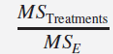

ratio of variance

In [44]:
62.5/2.5

25.0

Test the calcualted F-test statistic

In [47]:
from scipy.stats import f
1-f.cdf(25,1,8)

0.0010528257933665186

In [49]:
stats.f_oneway(df2["One"],df2["Two"])

F_onewayResult(statistic=25.0, pvalue=0.0010528257933665396)

Interesting note that this is the t-statistic squared with the same p-value

In [52]:
print(stats.ttest_ind(One, Two, equal_var=True))

TtestResult(statistic=-5.0, pvalue=0.001052825793366539, df=8.0)


# Paired t-test

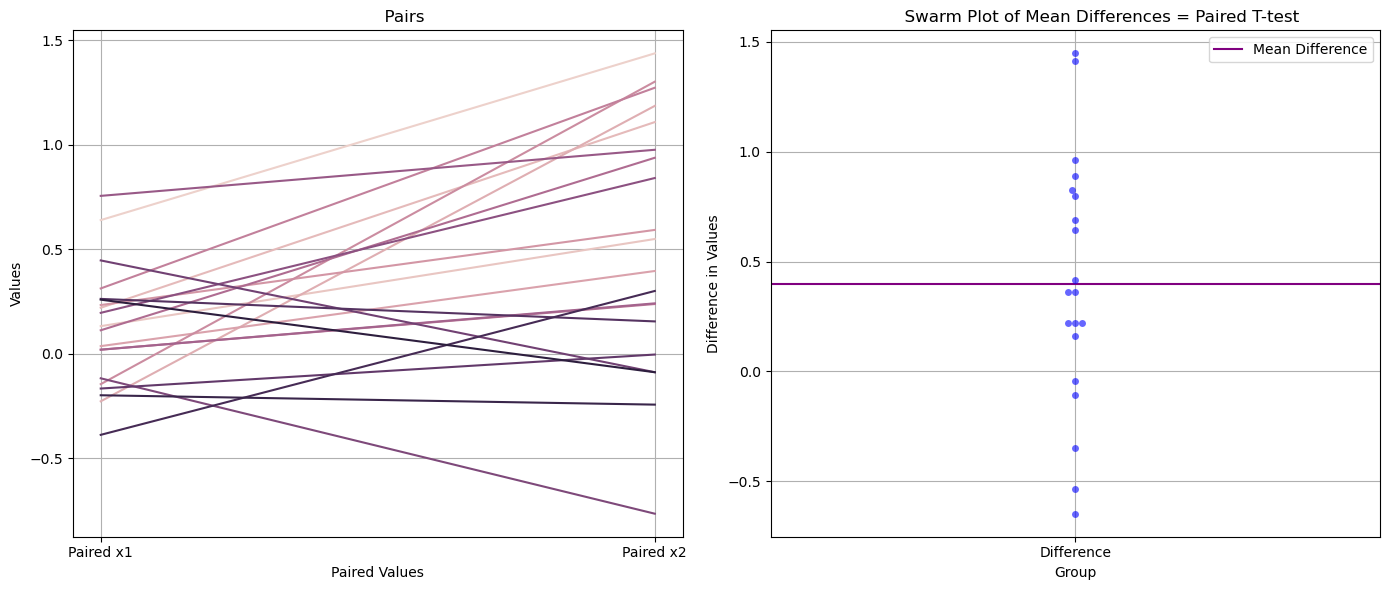

In [55]:
# Install necessary packages if you haven't already
# !pip install numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Sample Data
N = 20  # Number of data points
D_t1 = pd.DataFrame({'y': np.random.normal(0.5, 0.6, N)})  # Sample D_t1 DataFrame for demonstration

# Data for plot
start = np.random.normal(0.2, 0.3, N)
D_tpaired = pd.DataFrame({
    'x': np.repeat([0, 1], N),  # Two groups: 0 and 1
    'y': np.concatenate([start, start + D_t1['y'].values]),  # Concatenate values for both groups
    'id': np.tile(np.arange(1, N + 1), 2)  # Use np.tile to repeat IDs for both groups
})

# Calculate means
mean_before = D_tpaired[D_tpaired['x'] == 0]['y'].mean()
mean_after = D_tpaired[D_tpaired['x'] == 1]['y'].mean()
mean_difference = mean_after - mean_before

# Create a DataFrame for the difference
difference_data = pd.DataFrame({
    'group': ['Difference'] * N,
    'y': D_tpaired[D_tpaired['x'] == 1]['y'].values - D_tpaired[D_tpaired['x'] == 0]['y'].values
})

# Plot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for pairs
sns.lineplot(data=D_tpaired, x='x', y='y', hue='id', estimator=None, ax=axs[0],legend=None)
axs[0].set_title('          Pairs')
axs[0].set_xlabel('Paired Values')
axs[0].set_ylabel('Values')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Paired x1', 'Paired x2'])  # Example labels
axs[0].grid()

# Swarm plot for differences
sns.swarmplot(data=difference_data, x='group', y='y', ax=axs[1], color='blue', alpha=0.6)
axs[1].axhline(mean_difference, color='purple', linestyle='-', label='Mean Difference')
axs[1].set_title('          Swarm Plot of Mean Differences = Paired T-test')
axs[1].set_xlabel('Group')
axs[1].set_ylabel('Difference in Values')
axs[1].legend()
axs[1].grid()

# Show plots
plt.tight_layout()
plt.show()


# Three- or more Samples

Linear model:  y<sub>ij = $\mu$ + $\tau$<sub>i</sub> + $\epsilon$<sub>ij

In [58]:
Three=pd.Series([9,10,11,12,13],name="Three")
df3=pd.concat([One,Two,Three],axis='columns')
df3

,One,Two,Three
0,1,6,9
1,2,7,10
2,3,8,11
3,4,9,12
4,5,10,13


In [60]:
# grand mean
GMA=(np.mean(One)+np.mean(Two)+np.mean(Three))/3
GMA

7.333333333333333

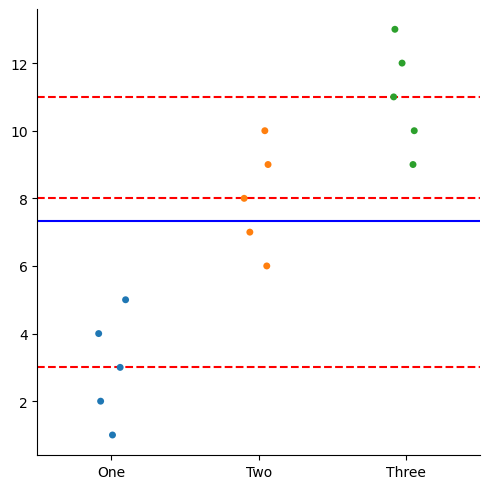

In [66]:
sns.catplot(data=df3)
plt.axhline(y=GMA,color="blue")
plt.axhline(y=np.mean(df3["One"]), linestyle='--',color="red") 
plt.axhline(y=np.mean(df3["Two"]), linestyle='--',color="red") 
plt.axhline(y=np.mean(df3["Three"]), linestyle='--',color="red") 

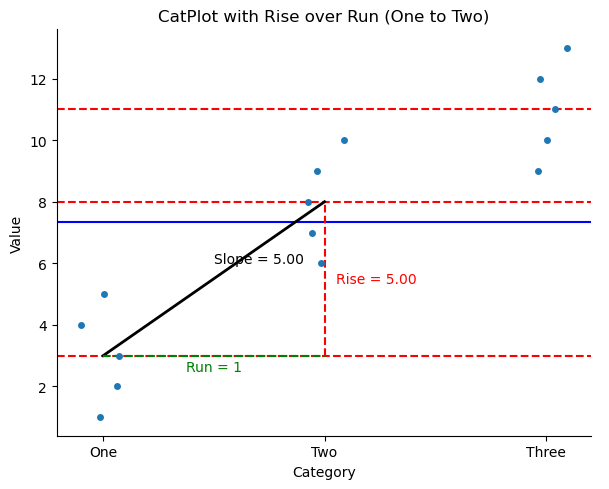

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Original data
One = pd.Series([1, 2, 3, 4, 5], name="One")
Two = pd.Series([6, 7, 8, 9, 10], name="Two")
Three = pd.Series([9, 10, 11, 12, 13], name="Three")
df3 = pd.concat([One, Two, Three], axis='columns')

# Melt into long format for Seaborn
df_long = df3.melt(var_name="Category", value_name="Value")

# Plot
g = sns.catplot(data=df_long, x="Category", y="Value", kind="strip", height=5, aspect=1.2)

# Get axis to overlay lines
ax = g.ax

# Add horizontal lines for means
means = df3.mean()
for cat, val in means.items():
    ax.axhline(y=val, linestyle='--', color='red')

# Optional: Add GMA line
GMA = (np.mean(One)+np.mean(Two)+np.mean(Three))/3
ax.axhline(y=GMA, color='blue', label="GMA")

# Add rise over run: between "One" and "Two"
x_labels = means.index.tolist()
x1, x2 = x_labels.index("One"), x_labels.index("Two")
y1, y2 = means["One"], means["Two"]

# Draw rise/run triangle
ax.plot([x1, x2], [y1, y2], 'k-', linewidth=2)  # hypotenuse
ax.plot([x2, x2], [y1, y2], 'r--')              # rise (vertical)
ax.plot([x1, x2], [y1, y1], 'g--')              # run (horizontal)

# Annotate rise and run
ax.text(x2 + 0.05, (y1 + y2) / 2, f"Rise = {y2 - y1:.2f}", color='red', va='center')
ax.text((x1 + x2) / 2, y1 - 0.5, f"Run = {x2 - x1}", color='green', ha='center')

# Annotate slope
slope = (y2 - y1) / (x2 - x1)
ax.text((x1 + x2) / 2, (y1 + y2) / 2 + 0.5, f"Slope = {slope:.2f}", color='black')

# Final touches
ax.set_title("CatPlot with Rise over Run (One to Two)")
plt.tight_layout()
plt.show()


In a two-sample test, you’re testing whether the difference in means is large enough compared to variability.

In linear regression, you're testing whether the slope of the line is far enough from zero to suggest a real relationship between the predictor and response.

We will use a t-distribution for both of these: Comparing an observed effect to what we’d expect if there were no real effect using a t-distirbution under a null hypothesis.